# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Linear-Model-With-CNN-Features" data-toc-modified-id="Linear-Model-With-CNN-Features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Model With CNN Features</a></div><div class="lev2 toc-item"><a href="#Math" data-toc-modified-id="Math-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Math</a></div><div class="lev3 toc-item"><a href="#SVM-as-Loss-Function" data-toc-modified-id="SVM-as-Loss-Function-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>SVM as Loss Function</a></div><div class="lev4 toc-item"><a href="#SVM-(Multiclass-Support-Vector-Machine-loss)" data-toc-modified-id="SVM-(Multiclass-Support-Vector-Machine-loss)-1111"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>SVM (Multiclass Support Vector Machine loss)</a></div><div class="lev4 toc-item"><a href="#Regularization-for-SVM" data-toc-modified-id="Regularization-for-SVM-1112"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Regularization for SVM</a></div><div class="lev3 toc-item"><a href="#Softmax-as-Loss-Function" data-toc-modified-id="Softmax-as-Loss-Function-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Softmax as Loss Function</a></div><div class="lev3 toc-item"><a href="#Optimization-with-SGD" data-toc-modified-id="Optimization-with-SGD-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Optimization with SGD</a></div><div class="lev4 toc-item"><a href="#Strategy-1:-A-very-bad-solution:-Random-Search" data-toc-modified-id="Strategy-1:-A-very-bad-solution:-Random-Search-1131"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Strategy 1: A very bad solution: <strong>Random Search</strong></a></div><div class="lev4 toc-item"><a href="#Strategy-2:-Random-Local-Search-(Slightly-Better)" data-toc-modified-id="Strategy-2:-Random-Local-Search-(Slightly-Better)-1132"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>Strategy 2: <strong>Random Local Search</strong> (Slightly Better)</a></div><div class="lev4 toc-item"><a href="#Strategy-3:-Following-the-Gradient" data-toc-modified-id="Strategy-3:-Following-the-Gradient-1133"><span class="toc-item-num">1.1.3.3&nbsp;&nbsp;</span>Strategy 3: Following the <strong>Gradient</strong></a></div><div class="lev4 toc-item"><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1134"><span class="toc-item-num">1.1.3.4&nbsp;&nbsp;</span>Gradient Descent</a></div><div class="lev4 toc-item"><a href="#Backpropagation-(Gradient-Descent-using-reverse-mode-autodiff)" data-toc-modified-id="Backpropagation-(Gradient-Descent-using-reverse-mode-autodiff)-1135"><span class="toc-item-num">1.1.3.5&nbsp;&nbsp;</span>Backpropagation (Gradient Descent using reverse-mode autodiff)</a></div><div class="lev2 toc-item"><a href="#Code" data-toc-modified-id="Code-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Code</a></div><div class="lev3 toc-item"><a href="#Setup" data-toc-modified-id="Setup-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Setup</a></div><div class="lev3 toc-item"><a href="#Playground" data-toc-modified-id="Playground-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Playground</a></div><div class="lev3 toc-item"><a href="#Linear-Model-with-Keras" data-toc-modified-id="Linear-Model-with-Keras-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Linear Model with Keras</a></div><div class="lev3 toc-item"><a href="#Linear-Model-with-VGG" data-toc-modified-id="Linear-Model-with-VGG-124"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Linear Model with VGG</a></div><div class="lev3 toc-item"><a href="#Modify-the-Vgg-Model" data-toc-modified-id="Modify-the-Vgg-Model-125"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Modify the Vgg Model</a></div>

# Linear Model With CNN Features 

## Math

### SVM as Loss Function

#### SVM (Multiclass Support Vector Machine loss)

$$   L = \sum_{j \ne y_i} max(0, s_j -s_{y_i} + \Delta) = 1$$

1. j for true label class
2. $ j \ne y_i$ for all incorrect class
3. $s_j$ for weight of the true label class and $s_{y_i}$ for weight of other incorrect class
4. $\Delta$ for tolerence of the difference
5. $max(0, -)$ aka hinge loss, people sometimes use squared hinge loss as $max(0, -)^2$ that penalizes violated margins more strongly. Usually linear hinge loss is good enough. 

In summary, the SVM loss function wants the score of the correct class $y_i$ to be larger than the incorrect class scores by at least by $\Delta$ (delta). If this is not the case, we will accumulate loss.

$i.e.$ The Multiclass Support Vector Machine "wants" the score of the correct class to be higher than all other scores by at least a margin of delta. 

#### Regularization for SVM
There is a problem with this SVM loss function is that there could multiple set of $W$ that satisfies (minimizing $L$ to 0). So we want to encode our $W$ to remove this ambiguity. A standard way is to extend the loss function with a regularization penalty $R(W)$. The most common scheme for regularization penalty is $L2$ norm that discourages large weights through an elementwise quadratic penalty over all parameters as shown below:

$$ R(W) = \sum_{k} \sum_{l} W_{k, l}^2$$

And thew new loss function $L$ now contains two parts: data loss (which is average loss $L_i$ over all samples$ and the regularization loss. That is the full Multiclass SVM loss: 

$$ L = \frac{1}{N} \sum_{i }L_{i} + \lambda R(W)$$

which can be expand to its full form as : $$ L = \frac{1}{N} \sum_{i } \sum_{j \ne y_i} max(0, f(x_i; W)_j -f(x_i; w)_{y_i} + \Delta) + \lambda \sum_{k} \sum_{l} W_{k, l}^2 $$ 

And this is able to improve the generalization performance at the end lead to less overfitting. As the $L2$ penalty prefers smaller and more diffuse weight vectors so the final classifier is encouraaged to take into acocunt all input dimensions to small amounts rather than a few input dimensions and very strongly.

### Softmax as Loss Function

In a softmax classifier, the function mapping $f(x_i; W) = W_{x_i}$ is unchanged, but it interprets these scores as unnormalized log porbabilities for each class and replace the hinge loss with corss-entrophy loss in the following form: 

$$ L_i =  -log \left(\frac{e^{f_i}}{\sum_j e^{f_j}} \right)$$

1. $f_j$ is the $j_th$ element of the vector of class scores $f$.
2. $\frac{e^{f_i}}{\sum_j e^{f_j}}$ is the **softmax** function, it takes over a vector of arbitrary real-valued scores and squashes it to a vector of values between zero and one that sum to one.

### Optimization with SGD

So with loss function, we are able to build the correlation that 

$$Better\, Prediction = Minimizing \, Loss \, Function$$

So our goal of **optimization** is to find $W$ which minimizes the loss function. 

#### Strategy 1: A very bad solution: **Random Search**

Do something like this:

In [ ]:
# assume X_train is the data where each column is an example (e.g. 3073 x 50,000)
# assume Y_train are the labels (e.g. 1D array of 50,000)
# assume the function L evaluates the loss function

bestloss = float("inf") # Python assigns the highest possible float value
for num in xrange(1000):
	W = np.random.randn(10, 3073) * 0.0001 # generate random parameters
	loss = L(X_train, Y_train, W) # get the loss over the entire training set
	if loss < bestloss: # keep track of the best solution
		bestloss = loss
		bestW = W
	print 'in attempt %d the loss was %f, best %f' % (num, loss, bestloss)

# prints:
# in attempt 0 the loss was 9.401632, best 9.401632
# in attempt 1 the loss was 8.959668, best 8.959668
# in attempt 2 the loss was 9.044034, best 8.959668
# in attempt 3 the loss was 9.278948, best 8.959668
# in attempt 4 the loss was 8.857370, best 8.857370
# in attempt 5 the loss was 8.943151, best 8.857370
# in attempt 6 the loss was 8.605604, best 8.605604
# ... (trunctated: continues for 1000 lines)

What should we do?

Core idea: **iterative refinement**. Of course, it turns out that we can do much better. The core idea is that finding the best set of weights W is a very difficult or even impossible problem (especially once W contains weights for entire complex neural networks), but the problem of refining a specific set of weights W to be slightly better is significantly less difficult. In other words, our approach will be to start with a random W and then iteratively refine it, making it slightly better each time.

#### Strategy 2: **Random Local Search** (Slightly Better)

So a little better solution is:
1. Do the same random search 
2. but only proceed if less loss.

In [ ]:
W = np.random.randn(10, 3073) * 0.001 # generate random starting W
bestloss = float("inf")
for i in xrange(1000):
	step_size = 0.0001
	Wtry = W + np.random.randn(10, 3073) * step_size
	loss = L(Xtr_cols, Ytr, Wtry)
	if loss < bestloss:
		W = Wtry
		bestloss = loss
		print 'iter %d loss is %f' % (i, bestloss)

#### Strategy 3: Following the **Gradient**

It turns out that there is no need to randomly search for a good direction: we can compute the best direction along which we should change our weight vector that is mathematically guaranteed to be the direction of the steepest descend (at least in the limit as the step size goes towards zero). This direction will be related to the **gradient** of the loss function. 

In our hiking analogy, this approach roughly corresponds to feeling the slope of the hill below our feet and stepping down the direction that feels steepest.

**Computing the Gradient**

There are two ways of computing gradient:
1. Numerical Gradient
2. Analytic Gradient

In [ ]:
# Numerical Gradient
def eval_numerical_gradient(f, x):
	""" 
	a naive implementation of numerical gradient of f at x 
	- f should be a function that takes a single argument
	- x is the point (numpy array) to evaluate the gradient at
	""" 

	fx = f(x) # evaluate function value at original point
	grad = np.zeros(x.shape)
	h = 0.00001

	# iterate over all indexes in x
	it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
	while not it.finished:

		# evaluate function at x+h
		ix = it.multi_index
		old_value = x[ix]
		x[ix] = old_value + h # increment by h
		fxh = f(x) # evalute f(x + h)
		x[ix] = old_value # restore to previous value (very important!)

		# compute the partial derivative
		grad[ix] = (fxh - fx) / h # the slope
		it.iternext() # step to next dimension

		return grad
    
# to use the generic code above we want a function that takes a single argument
# (the weights in our case) so we close over X_train and Y_train
def CIFAR10_loss_fun(W):
	return L(X_train, Y_train, W)

W = np.random.rand(10, 3073) * 0.001 # random weight vector
df = eval_numerical_gradient(CIFAR10_loss_fun, W) # get the gradient

loss_original = CIFAR10_loss_fun(W) # the original loss
print 'original loss: %f' % (loss_original, )

# lets see the effect of multiple step sizes
for step_size_log in [-10, -9, -8, -7, -6, -5,-4,-3,-2,-1]:
	step_size = 10 ** step_size_log
	W_new = W - step_size * df # new position in the weight space
	loss_new = CIFAR10_loss_fun(W_new)
	print 'for step size %f new loss: %f' % (step_size, loss_new)

# prints:
# original loss: 2.200718
# for step size 1.000000e-10 new loss: 2.200652
# for step size 1.000000e-09 new loss: 2.200057
# for step size 1.000000e-08 new loss: 2.194116
# for step size 1.000000e-07 new loss: 2.135493
# for step size 1.000000e-06 new loss: 1.647802
# for step size 1.000000e-05 new loss: 2.844355
# for step size 1.000000e-04 new loss: 25.558142
# for step size 1.000000e-03 new loss: 254.086573
# for step size 1.000000e-02 new loss: 2539.370888
# for step size 1.000000e-01 new loss: 25392.214036

Because of the fact numerical gradient are expensive to compute for datasets with millions of features which is very common for DNNs. ( Because each step needs to compute the gradient for each feature, so it is linear complexity).

We normally use the other option: **analytic gradient**.

In which we use a direct formula for the gradient which is way faster to compute.
Suppose we have the SVM loss function for a single data point as follows:

$$ L_i = \sum_{j \ne y_i} [max(0, w_j^Tx_i - w_{y_i}^Tx_i + \Delta)]$$

And we can differentiate the function w/ respect to weights $W$. $e.g.$, taking the gradient with respect to $w_{y_i}$ we can obtain:

$$ \nabla_{w_j}  L_i = - \left( \sum_{j \ne y_i}  \mathbb{1} (w_j^Tx_i - w_{y_i}^Tx_i + \Delta > 0) \right) x_i$$

where $\mathbb{1}$ is the indicator function which
1. if the condition inside is true, it evals to 1
2. if false, it evals to 0

The function looks confusing but at its essence, it is equivalent to:

Count the number of classes that didn't meet the desired margin $\Delta$ and scale the data vector $x_i$ by this margin. And the result is the gradient.

#### Gradient Descent

Now we can compute the gradient of the loss function, the procedure of repeatedly evaluating the gradient and then performing a parameter update is called *Gradient Descent*. A vanilla version looks like this:

In [ ]:
# Vanilla Gradient Descent
while True:
	weights_grad = evaluate_gradient(loss_fun, data, weights)
	weights += - step_size * weights_grad # perform parameter update

**This simple loop is the core of every nueural network libs. **
There are a few different methods of gradient descent:
1. Batch Gradient Descent
2. Mini-Batch Gradient Descent
3. Stochastic Gradietn Descent

** Mini-Batch Gradient Descent ** is the mostly used one and often refered as **SGD**. It takes a random batch of (32, 64, 128, 256) arbitrary number of samples and compute gradient descent on it and update the parameters(weights) every time. 

In [ ]:
# Vanilla Minibatch Gradient Descent
while True:
    data_batch = sample_training_data(data, 256) # sample 256 examples
    weights_grad = evaluate_gradient(loss_fun, data_batch, weights)
    weights += - step_size * weights_grad # perform parameter update

#### Backpropagation (Gradient Descent using reverse-mode autodiff)

An ANN(MLP, multi-layer perceptron) is composed of a input layer and n (n $\geq$ 1) hidden layers and one final layer. Every layer except the output layer includes a bias neuron and is fully connected to next layer. When an ANN has $\geq$ 2 hidden layers, it is called a DNN.

But for years people struggle to find a way to train DNN uintil backpropagation.

For each trainning instance, the algorithm feeds it to the network and computes the output of every neuron in each consecutive layer. (Known as the forward pass). Then it measures the ouput error of the network and it computes how much each neuron in hte last hidden layer contributed to each output neuron's error. It then proceeds to measure how much of these error contributions comes from the previous hidden layer. And this logic carries on until the algorithm reaches the input layer. 

Eventually, this reverse pass efficently measures the error gradient accross all the connection wieghts in the DNN by propagating the error gradient backward in the network. 

In short, for each training instance the backpropagation algorithm first makes a prediction by some scheme (**the forward pass**). Then it measures the error of this prediction then goes through each layer in each layer in reverse order to measure the error contribution from each connection (**the reverse pass**). And slightly tweaks the connection weights to reduce the error (**Gradient Dscent step**). 

The Math details is skipped here, for details checkout here: [Back Propagation](http://cs231n.github.io/optimization-2/).

## Code

### Setup

In [1]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import *

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [2]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

### Playground

In [3]:
??get_data

### Linear Model with Keras

In [4]:
x = random((30,2 ))
x[:5]

array([[ 0.781 ,  0.9066],
       [ 0.1277,  0.911 ],
       [ 0.6379,  0.1174],
       [ 0.0944,  0.8296],
       [ 0.4602,  0.1488]])

In [5]:
y = np.dot(x, [4., 5.]) + 6.
y[:5]

array([ 13.657 ,  11.0659,   9.139 ,  10.5255,   8.5846])

In [6]:
linear_model = Sequential([Dense(1, input_shape=(2,))])
linear_model.compile(optimizer=SGD(lr=0.01), loss='mse')

In [7]:
linear_model.evaluate(x, y, verbose=0)

119.82157897949219

In [8]:
linear_model.fit(x, y, nb_epoch=30, batch_size=1, verbose=0)

In [9]:
linear_model.evaluate(x, y)

30/30 [==============================] - 0s


0.014038173481822014

In [10]:
linear_model.get_weights()

[array([[ 3.8656],
        [ 4.5733]], dtype=float32), array([ 6.3264], dtype=float32)]

### Linear Model with VGG

So we now have a basic model that is able to convert any input to any output using the universal function, we can just use the 1000 output from the vgg model and fit it to 2 output.

In [11]:
path = "data/dogscats/"
model_path = "models/" + "dogs_cats/"
if not os.path.exists(model_path): os.mkdir(model_path)

In [12]:
batch_size = 100

In [13]:
val_batches = get_batches(path+'valid', shuffle=False, batch_size=1)
batches = get_batches(path+'train', shuffle=False, batch_size=1)

Found 2000 images belonging to 2 classes.
Found 23000 images belonging to 2 classes.


In [14]:
from vgg16 import Vgg16

In [15]:
vgg = Vgg16()

In [16]:
model = vgg.model

Todos:
1. Get labels for all images
2. Get predictions for all images.
3. Use a linear model to fit the predictions to isDog/isCat

In [17]:
val_data = get_data(path+'valid')
trn_data = get_data(path+ 'train')

Found 2000 images belonging to 2 classes.
Found 23000 images belonging to 2 classes.


In [18]:
trn_data.shape

(23000, 3, 224, 224)

In [19]:
save_array(model_path+ 'train_data.bc', trn_data)
save_array(model_path+'valid_data.bc', val_data)

In [20]:
trn_data = load_array(model_path+'train_data.bc')
val_data = load_array(model_path+'valid_data.bc')

In [21]:
val_data.shape

(2000, 3, 224, 224)

In [22]:
def onehot(x): 
    return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [23]:
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [24]:
trn_labels.shape
trn_classes[:4]
trn_labels[:4]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [25]:
trn_features = model.predict(trn_data, batch_size=batch_size)
val_features = model.predict(val_data, batch_size=batch_size)

In [26]:
trn_features.shape

(23000, 1000)

In [27]:
save_array(model_path+'train_lastlayer_features.bc', trn_features)
save_array(model_path+'valid_lastlayer_features.bc', val_features)

In [28]:
trn_features = load_array(model_path+'train_lastlayer_features.bc')
val_features = load_array(model_path+'valid_lastlayer_features.bc')

In [29]:
trn_features[:5]

array([[  1.4135e-05,   3.8687e-07,   8.6534e-06, ...,   4.9458e-06,   4.6688e-04,   4.6785e-03],
       [  3.8557e-06,   1.5945e-05,   1.4344e-06, ...,   3.0623e-06,   2.3711e-04,   1.5105e-04],
       [  4.7311e-07,   1.6243e-05,   2.1749e-06, ...,   2.8995e-07,   6.4160e-05,   5.9271e-03],
       [  2.1218e-07,   5.6982e-07,   9.7189e-07, ...,   2.3288e-06,   3.6301e-05,   7.4142e-04],
       [  1.4311e-06,   2.1720e-05,   1.4053e-05, ...,   1.7267e-06,   2.5162e-04,   5.2056e-04]], dtype=float32)

In [30]:
# 1000 inputs, since that's the saved features, and 2 outputs, for dog and cat
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
batch_size=64

In [32]:
lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size, 
       validation_data=(val_features, val_labels))

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 0s - loss: 0.0964 - acc: 0.9674 - val_loss: 0.1004 - val_acc: 0.9640
Epoch 2/3
23000/23000 [==============================] - 0s - loss: 0.0802 - acc: 0.9747 - val_loss: 0.1108 - val_acc: 0.9650
Epoch 3/3
23000/23000 [==============================] - 0s - loss: 0.0789 - acc: 0.9767 - val_loss: 0.1091 - val_acc: 0.9665


In [33]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_5 (Dense)                  (None, 2)             2002        dense_input_2[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


In [34]:
# We want both the classes...
preds = lm.predict_classes(val_features, batch_size=batch_size)
# ...and the probabilities of being a cat
probs = lm.predict_proba(val_features, batch_size=batch_size)[:,0]
probs[:8]

  64/2000 [..............................] - ETA: 0s

array([ 1.    ,  0.2118,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ], dtype=float32)

In [35]:
preds[:5]

array([0, 1, 0, 0, 0])

In [36]:
filenames  = val_batches.filenames
n_view = 4

In [37]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

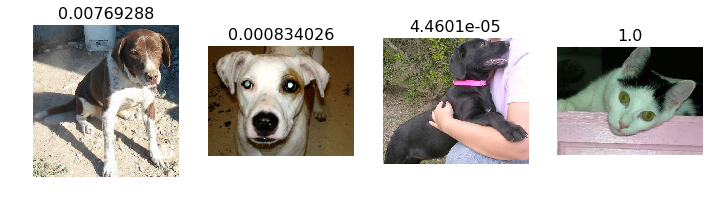

In [38]:
#1. A few correct labels at random
correct = np.where(preds==val_labels[:,1])[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

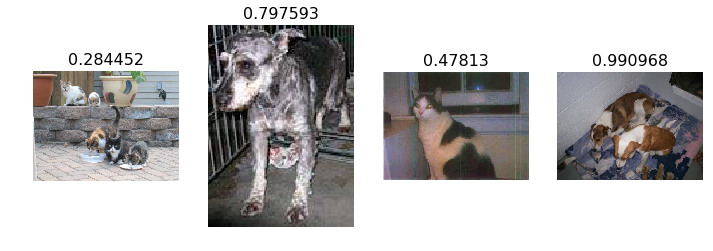

In [39]:
#2.  A few incorrect labels at random
incorrect = np.where(preds!=val_labels[:,1])[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

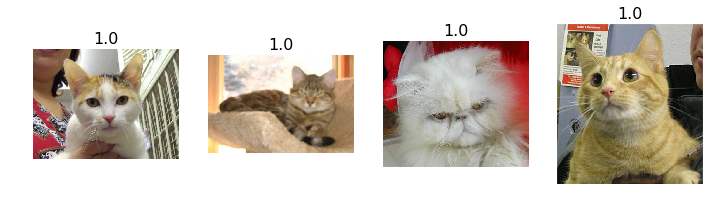

In [40]:
#3. The images we most confident were cats, and are actually cats
correct_cats = np.where((preds==0) & (preds==val_labels[:,1]))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

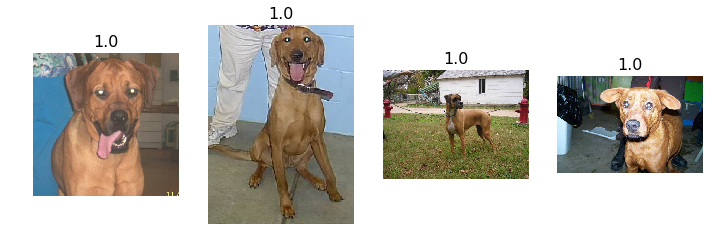

In [41]:
# 4. The images we are most confident are dogs and are actual dogs
correct_dogs = np.where((preds==1) & (preds==val_labels[:,1]))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], 1-probs[correct_dogs][most_correct_dogs])

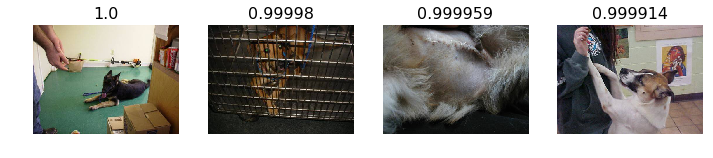

In [42]:
#5. The images we most confident were cats, and are actually dogs
correct_cats = np.where((preds==0) & (preds!=val_labels[:,1]))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

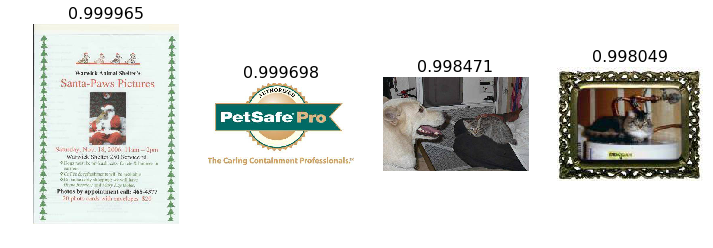

In [43]:
# 4. The images we are most confident are dogs and are actual cats
correct_dogs = np.where((preds==1) & (preds!=val_labels[:,1]))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], 1-probs[correct_dogs][most_correct_dogs])

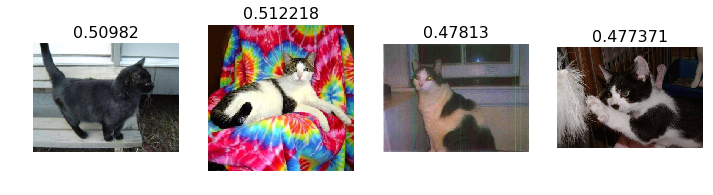

In [44]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(probs-0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

In [45]:
cm = confusion_matrix(val_classes, preds)

[[954  46]
 [ 21 979]]


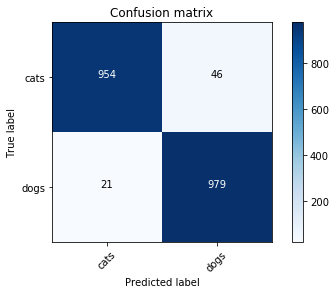

In [46]:
plot_confusion_matrix(cm, val_batches.class_indices)

### Modify the Vgg Model

In [47]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [48]:
model.pop()

In [49]:
for layer in model.layers: layer.trainable = False

In [50]:
model.add(Dense(2, activation='softmax'))

In [51]:
??vgg.finetune

In [52]:
gen=image.ImageDataGenerator()
batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False)

In [53]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, samples_per_epoch=batches.n, nb_epoch=nb_epoch, 
                        validation_data=val_batches, nb_val_samples=val_batches.n)

In [54]:
optimizer = RMSprop(lr=0.1)

In [55]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
fit_model(model, batches, val_batches, nb_epoch=3)

Epoch 1/3
23000/23000 [==============================] - 714s - loss: 0.6303 - acc: 0.9584 - val_loss: 0.3231 - val_acc: 0.9795
Epoch 2/3
23000/23000 [==============================] - 711s - loss: 0.4746 - acc: 0.9697 - val_loss: 0.4644 - val_acc: 0.9705
Epoch 3/3
23000/23000 [==============================] - 712s - loss: 0.4860 - acc: 0.9693 - val_loss: 0.4191 - val_acc: 0.9740


In [ ]:
model.save_weights(model_path+'finetune_vgg_to_linear1.h5')

In [ ]:
model.load_weights(model_path+'finetune_vgg_to_linear1.h5')

In [58]:
model.evaluate(val_data, val_labels)

2000/2000 [==============================] - 57s    


[0.36607783508301472, 0.97699999999999998]

In [59]:
preds = model.predict_classes(val_data, batch_size=batch_size)
probs = model.predict_proba(val_data, batch_size=batch_size)[:,0]
probs[:8]

2000/2000 [==============================] - 57s    


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [60]:
cm = confusion_matrix(val_classes, preds)

[[984  16]
 [ 30 970]]


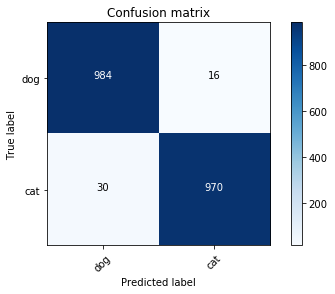

In [61]:
plot_confusion_matrix(cm, {'cat':0, 'dog':1})